# Import Python Libraries

In [1]:
import numpy as np
import time
import random

In [2]:
from sklearn.ensemble import RandomForestClassifier 
import sklearn.metrics as metrics

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


# FASHION data

In [4]:
#Loan in Fashion Data
mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

# NUMBER data

In [5]:
#Load in Data
#mnist = tf.keras.datasets.mnist # 28x28 Handwritten Digits 0-9

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train = x_train/255 
x_test = x_test/255 

In [7]:
print(type(x_train))
print(x_train.shape)

print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [8]:
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)
#multiplication of the height and length gives the number of pixels, aka total size

Shape =  (28, 28)
TOTAL SIZE =  784


Our data us 28 by 28 and has an area of 784

In [9]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who= 27360
5


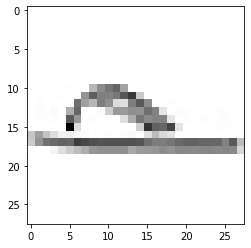

In [12]:
who=0
who=getRandomIndex(x_train)

print("who=", who)

print(y_train[who])
#print(x_train[who])

#for black and white plot
plt.imshow(x_train[who], plt.cm.binary) 

#for color plot
#plt.imshow(x_train[who]) 

# SOLVE USING RANDOM FORESTS

Random Forest model needs the data to be flatten so we will first need to flatten our data as below:

In [13]:
new_x_train = []
for i in x_train :
    new_x_train.append(i.flatten())
new_x_train = np.array(new_x_train)

new_x_test = []
for i in x_test :
    new_x_test.append(i.flatten())
new_x_test = np.array(new_x_test)

print(x_train.shape)
print(new_x_train.shape)

(60000, 28, 28)
(60000, 784)


In [14]:
start_time = time.time()

theTrees = int(2*TOTAL_SIZE)

clf = RandomForestClassifier(n_estimators = theTrees)
clf.fit(new_x_train, y_train)

print("Execution Time = ", (time.time()-start_time))

Execution Time =  1443.4419178962708


In [15]:
pred_train = clf.predict(new_x_train)
print(pred_train[0])
RF_acc_train = metrics.accuracy_score(y_train, pred_train)
print("train accuracy", RF_acc_train)

pred_test = clf.predict(new_x_test)
print(pred_test[0])
RF_acc = metrics.accuracy_score(y_test, pred_test)
print("test accuracy", RF_acc)

9
train accuracy 1.0
9
test accuracy 0.8785


Random Forest model was able to get 100% accuracy on our training data.

Random Forest that we ran for our test data which also gave an output of 9 showed 88% accuracy. Even though 88% accuracy is decent, we hope to get a test data accuracy of above 90%.

# SOLVE USING TENSOR FLOW NEURAL NETWORKS

In [38]:
theEpochs = 500

theActivation = tf.keras.activations.relu
 
units_01 = int(2*TOTAL_SIZE )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout(0.2)


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 16
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

The model was ran with 500 Epochs, two layers, with 20%/80% split and 16 batches. The 16 batches were introduced for time and model efficiency.

In [39]:
# Build the Model

start_time = time.time()

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape=INPUT_SHAPE ) )
model.add( DENSE_LAYER_01 )
model.add( DROPOUT_LAYER )
model.add( DENSE_LAYER_02 )
model.add( DENSE_LAYER_XX )
model.compile( optimizer=theOptimizer, loss=theLossMetric )

model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
#model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )

model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )

print("Execution Time = ", (time.time()-start_time))

Epoch 1/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.5279 - accuracy: 0.8093 - val_loss: 0.4216 - val_accuracy: 0.8460
Epoch 2/500
3000/3000 [==============================] - 63s 21ms/step - loss: 0.4150 - accuracy: 0.8509 - val_loss: 0.4174 - val_accuracy: 0.8336
Epoch 3/500
3000/3000 [==============================] - 63s 21ms/step - loss: 0.3829 - accuracy: 0.8596 - val_loss: 0.3484 - val_accuracy: 0.8688
Epoch 4/500
3000/3000 [==============================] - 63s 21ms/step - loss: 0.3624 - accuracy: 0.8658 - val_loss: 0.3409 - val_accuracy: 0.8763
Epoch 5/500
3000/3000 [==============================] - 64s 21ms/step - loss: 0.3416 - accuracy: 0.8760 - val_loss: 0.3921 - val_accuracy: 0.8505
Epoch 6/500
3000/3000 [==============================] - 64s 21ms/step - loss: 0.3292 - accuracy: 0.8783 - val_loss: 0.3493 - val_accuracy: 0.8742
Epoch 7/500
3000/3000 [==============================] - 64s 21ms/step - loss: 0.3261 - accuracy: 0.8783 - val_loss: 0

3000/3000 [==============================] - 65s 22ms/step - loss: 0.1907 - accuracy: 0.9315 - val_loss: 0.4642 - val_accuracy: 0.8913
Epoch 57/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.1890 - accuracy: 0.9305 - val_loss: 0.4805 - val_accuracy: 0.8953
Epoch 58/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.1908 - accuracy: 0.9314 - val_loss: 0.4444 - val_accuracy: 0.8937
Epoch 59/500
3000/3000 [==============================] - 64s 21ms/step - loss: 0.1886 - accuracy: 0.9319 - val_loss: 0.5296 - val_accuracy: 0.8917
Epoch 60/500
3000/3000 [==============================] - 62s 21ms/step - loss: 0.1835 - accuracy: 0.9331 - val_loss: 0.5120 - val_accuracy: 0.8912
Epoch 61/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1912 - accuracy: 0.9319 - val_loss: 0.4652 - val_accuracy: 0.8974
Epoch 62/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1863 - accuracy: 0.9319 - val_loss: 0.4898 

3000/3000 [==============================] - 62s 21ms/step - loss: 0.1484 - accuracy: 0.9475 - val_loss: 0.6589 - val_accuracy: 0.9003
Epoch 112/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1519 - accuracy: 0.9474 - val_loss: 0.7178 - val_accuracy: 0.8957
Epoch 113/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1475 - accuracy: 0.9494 - val_loss: 0.6898 - val_accuracy: 0.8942
Epoch 114/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1462 - accuracy: 0.9477 - val_loss: 0.7486 - val_accuracy: 0.8976
Epoch 115/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1472 - accuracy: 0.9460 - val_loss: 0.6843 - val_accuracy: 0.8963
Epoch 116/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1423 - accuracy: 0.9488 - val_loss: 0.6161 - val_accuracy: 0.8988
Epoch 117/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1447 - accuracy: 0.9490 - val_loss: 0

3000/3000 [==============================] - 86s 29ms/step - loss: 0.1253 - accuracy: 0.9569 - val_loss: 0.8219 - val_accuracy: 0.8940
Epoch 167/500
3000/3000 [==============================] - 81s 27ms/step - loss: 0.1226 - accuracy: 0.9582 - val_loss: 0.9267 - val_accuracy: 0.8947
Epoch 168/500
3000/3000 [==============================] - 77s 26ms/step - loss: 0.1217 - accuracy: 0.9572 - val_loss: 1.0221 - val_accuracy: 0.8982
Epoch 169/500
3000/3000 [==============================] - 74s 25ms/step - loss: 0.1328 - accuracy: 0.9569 - val_loss: 1.0059 - val_accuracy: 0.8915
Epoch 170/500
3000/3000 [==============================] - 75s 25ms/step - loss: 0.1247 - accuracy: 0.9584 - val_loss: 1.0522 - val_accuracy: 0.8925
Epoch 171/500
3000/3000 [==============================] - 85s 28ms/step - loss: 0.1320 - accuracy: 0.9560 - val_loss: 0.9600 - val_accuracy: 0.8985
Epoch 172/500
3000/3000 [==============================] - 78s 26ms/step - loss: 0.1225 - accuracy: 0.9591 - val_loss: 1

3000/3000 [==============================] - 70s 23ms/step - loss: 0.1087 - accuracy: 0.9624 - val_loss: 0.9710 - val_accuracy: 0.8993
Epoch 221/500
3000/3000 [==============================] - 67s 22ms/step - loss: 0.1214 - accuracy: 0.9622 - val_loss: 0.9173 - val_accuracy: 0.8988
Epoch 222/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.1071 - accuracy: 0.9635 - val_loss: 1.0250 - val_accuracy: 0.8921
Epoch 223/500
3000/3000 [==============================] - 62s 21ms/step - loss: 0.1133 - accuracy: 0.9612 - val_loss: 0.9599 - val_accuracy: 0.8979
Epoch 224/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.1151 - accuracy: 0.9613 - val_loss: 0.8713 - val_accuracy: 0.8972
Epoch 225/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.1075 - accuracy: 0.9636 - val_loss: 1.0269 - val_accuracy: 0.8942
Epoch 226/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.1086 - accuracy: 0.9627 - val_loss: 1

3000/3000 [==============================] - 69s 23ms/step - loss: 0.1082 - accuracy: 0.9678 - val_loss: 1.3182 - val_accuracy: 0.8944
Epoch 276/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.1030 - accuracy: 0.9676 - val_loss: 1.1830 - val_accuracy: 0.8965
Epoch 277/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.1005 - accuracy: 0.9666 - val_loss: 1.2012 - val_accuracy: 0.8966
Epoch 278/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.0973 - accuracy: 0.9662 - val_loss: 1.2600 - val_accuracy: 0.8954
Epoch 279/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.1136 - accuracy: 0.9654 - val_loss: 1.3647 - val_accuracy: 0.8992
Epoch 280/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.0971 - accuracy: 0.9677 - val_loss: 1.2438 - val_accuracy: 0.8975
Epoch 281/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1082 - accuracy: 0.9667 - val_loss: 1

3000/3000 [==============================] - 67s 22ms/step - loss: 0.0899 - accuracy: 0.9701 - val_loss: 1.2148 - val_accuracy: 0.8976
Epoch 331/500
3000/3000 [==============================] - 70s 23ms/step - loss: 0.0887 - accuracy: 0.9709 - val_loss: 1.4092 - val_accuracy: 0.8997
Epoch 332/500
3000/3000 [==============================] - 67s 22ms/step - loss: 0.0995 - accuracy: 0.9708 - val_loss: 1.2735 - val_accuracy: 0.8972
Epoch 333/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.0958 - accuracy: 0.9708 - val_loss: 1.6651 - val_accuracy: 0.8948
Epoch 334/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.0859 - accuracy: 0.9715 - val_loss: 1.4529 - val_accuracy: 0.8955
Epoch 335/500
3000/3000 [==============================] - 66s 22ms/step - loss: 0.1069 - accuracy: 0.9692 - val_loss: 1.4135 - val_accuracy: 0.8941
Epoch 336/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.0866 - accuracy: 0.9715 - val_loss: 1

3000/3000 [==============================] - 69s 23ms/step - loss: 0.0856 - accuracy: 0.9726 - val_loss: 1.6374 - val_accuracy: 0.8963
Epoch 386/500
3000/3000 [==============================] - 69s 23ms/step - loss: 0.0806 - accuracy: 0.9733 - val_loss: 1.7281 - val_accuracy: 0.8963
Epoch 387/500
3000/3000 [==============================] - 71s 24ms/step - loss: 0.0898 - accuracy: 0.9730 - val_loss: 1.5474 - val_accuracy: 0.8956
Epoch 388/500
3000/3000 [==============================] - 65s 22ms/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 1.5904 - val_accuracy: 0.8975
Epoch 389/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.0846 - accuracy: 0.9743 - val_loss: 1.4616 - val_accuracy: 0.8938
Epoch 390/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.0871 - accuracy: 0.9725 - val_loss: 1.5198 - val_accuracy: 0.8962
Epoch 391/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 1

3000/3000 [==============================] - 60s 20ms/step - loss: 0.0779 - accuracy: 0.9752 - val_loss: 1.8823 - val_accuracy: 0.8962
Epoch 441/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.0826 - accuracy: 0.9756 - val_loss: 2.1876 - val_accuracy: 0.8959
Epoch 442/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0838 - accuracy: 0.9736 - val_loss: 2.1137 - val_accuracy: 0.8951
Epoch 443/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0832 - accuracy: 0.9750 - val_loss: 2.0055 - val_accuracy: 0.8968
Epoch 444/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 1.9294 - val_accuracy: 0.8942
Epoch 445/500
3000/3000 [==============================] - 61s 20ms/step - loss: 0.0834 - accuracy: 0.9751 - val_loss: 2.0420 - val_accuracy: 0.8967
Epoch 446/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 1

3000/3000 [==============================] - 61s 20ms/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 2.1907 - val_accuracy: 0.8942
Epoch 496/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0755 - accuracy: 0.9769 - val_loss: 2.0772 - val_accuracy: 0.8956
Epoch 497/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0785 - accuracy: 0.9780 - val_loss: 2.3503 - val_accuracy: 0.8992
Epoch 498/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 2.0977 - val_accuracy: 0.8975
Epoch 499/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0914 - accuracy: 0.9751 - val_loss: 2.1641 - val_accuracy: 0.8927
Epoch 500/500
3000/3000 [==============================] - 60s 20ms/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 2.0307 - val_accuracy: 0.8963
Execution Time =  32607.207696914673


In [50]:
print('The NN model took',round((32607.207696914673/60)/60,0),'hours to completely run')

The NN model took 9.0 hours to completely run


In [40]:
probs = model.predict(x_test)

pred_list = []
for p in probs :
    pred_list.append(np.argmax(p))
pred = np.array(pred_list)
acc_score = metrics.accuracy_score(y_test, pred)

for i in range(5):
    who = getRandomIndex(x_test)
    print("WHO = ", who, " Predicte =", pred[who], " Actual = ", y_test[who])

print(" --------- ")
print("accuracy = ", acc_score)

WHO =  3521  Predicte = 5  Actual =  5
WHO =  8600  Predicte = 8  Actual =  8
WHO =  1982  Predicte = 9  Actual =  9
WHO =  6810  Predicte = 5  Actual =  5
WHO =  1628  Predicte = 3  Actual =  3
 --------- 
accuracy =  0.8939


In [41]:
NN_loss, NN_acc = model.evaluate(x_test, y_test)
print("loss=", NN_loss)
print("accuracy", NN_acc)

313/313 [==============================] - 3s 9ms/step - loss: 2.5527 - accuracy: 0.8939
loss= 2.552696466445923
accuracy 0.8938999772071838


The model has 89.3% accuracy with a loss factor of 2.55. 

In [42]:
model.save( theTensorFlowSaveFile )

INFO:tensorflow:Assets written to: TF_Number_Model/assets


In [43]:
new_model= tf.keras.models.load_model( theTensorFlowSaveFile )

In [44]:
predictions = new_model.predict(x_test) 

[4.7263020e-01 0.0000000e+00 2.6649794e-35 5.2736974e-01 0.0000000e+00
 0.0000000e+00 1.4931778e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00]
predict= 3 actual= 3


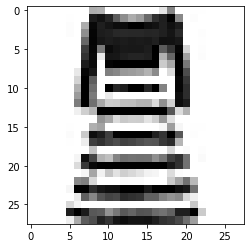

In [45]:
# get a random index from our test set
who=getRandomIndex(x_test)
print( predictions[who]) # probability score
result = np.argmax(list(predictions[who]))
print("predict=",result,"actual=",y_test[who])
plt.imshow(x_test[who], plt.cm.binary)
#plt.show()

# Accuracy of RANDOM FOREST and NEURAL NETWORK

In [46]:
print("RF accuracy", RF_acc )
print("NN accuracy",NN_acc)

RF accuracy 0.8785
NN accuracy 0.8938999772071838


We observe a 2% improvement in accuracy between our Random Forest Model and Tensor Flow NN model. 